<center>
    <h1><b> KNN: K - Nearest Neighbours Classification</b></h1>
</center>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report

%matplotlib inline

In [2]:
# Loading the iris dataset
iris = load_iris()

In [3]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [4]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [6]:
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df.head(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2


In [7]:
df['target'] = iris.target
df[:1]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0


In [8]:
df['flower_name'] = df['target'].apply(lambda x: iris.target_names[x])

In [9]:
df0 = df[df['target'] == 0]
df0.head(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa


In [10]:
df1 = df[df['target'] == 1]
df1.head(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
50,7.0,3.2,4.7,1.4,1,versicolor
51,6.4,3.2,4.5,1.5,1,versicolor


In [11]:
df2 = df[df['target'] == 2]
df2.head(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
100,6.3,3.3,6.0,2.5,2,virginica
101,5.8,2.7,5.1,1.9,2,virginica


### Plotting Sepal Length vs Sepal Width (Setosa vs Versicolor)

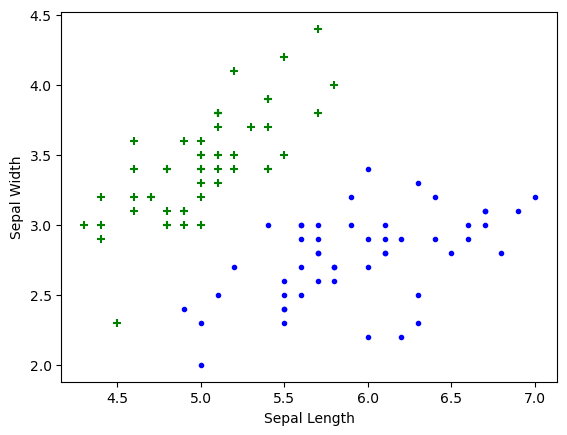

In [12]:
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.scatter(df0['sepal length (cm)'], df0['sepal width (cm)'], color = 'g', marker = '+')
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'], color='b', marker = '.');

### Petal Length vs Petal Width (Setosa vs Versicolor)

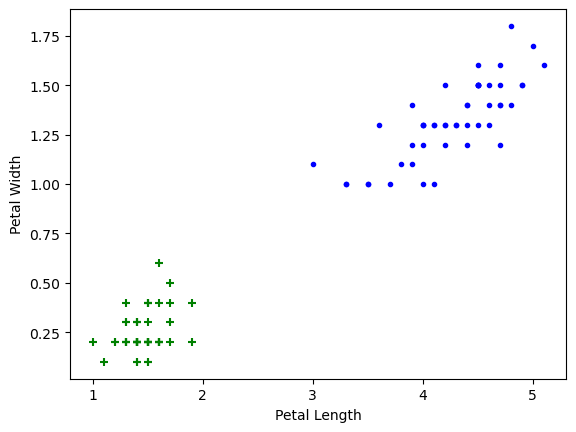

In [13]:
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.scatter(df0['petal length (cm)'], df0['petal width (cm)'], color = 'g', marker = '+')
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'], color = 'b', marker = '.');

### Cresting X and y split

In [14]:
X = df.drop(columns = ['target', 'flower_name'], axis = 'columns')
y = df['target']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [16]:
len(X_train)

120

In [17]:
len(X_test)

30

## KNN Model
------------------

## Elbow Plot Method
To determine the number of clusters (k) in the dataset using K-Means

In [18]:
from sklearn.cluster import KMeans

In [19]:
k_range = range(1, 10)
sse = []  # sum of square error
for k in k_range:
    km = KMeans(n_clusters = k, n_init = 10)
    km.fit(df[['sepal length (cm)',	'sepal width (cm)',	'petal length (cm)', 'petal width (cm)']])
    sse.append(km.inertia_)

C:\Users\Banji\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Banji\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Banji\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Banji\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Window

In [20]:
sse

[681.3706,
 152.34795176035792,
 78.85144142614601,
 57.228473214285714,
 46.44618205128205,
 39.28923092579935,
 34.29822966507177,
 30.112388528138524,
 28.19923593073593]

C:\Users\Banji\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Banji\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


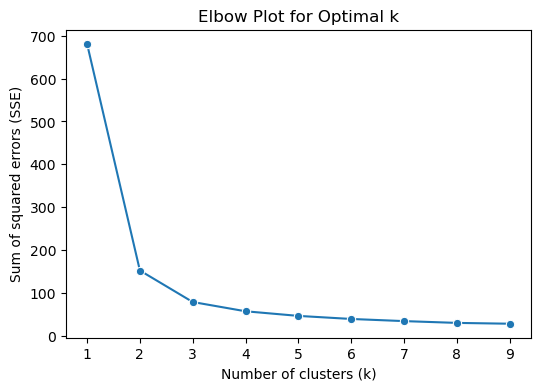

In [21]:
# Plot the elbow plot to determine the optimal k
plt.figure(figsize=(6, 4))
sb.lineplot(x=k_range, y=sse, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of squared errors (SSE)')
plt.title('Elbow Plot for Optimal k')
plt.show()

In [22]:
knn = KNeighborsClassifier(n_neighbors = 10)  # note that 3 is the k value but 10 is used to have some errors because of confusion matrix calculation
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [23]:
knn.score(X_test, y_test)

0.9666666666666667

### Calculating the Confusion Matrix

In [24]:
y_predict = knn.predict(X_test)

In [25]:
con_mat = confusion_matrix(y_test, y_predict)
con_mat

array([[11,  0,  0],
       [ 0, 12,  1],
       [ 0,  0,  6]], dtype=int64)

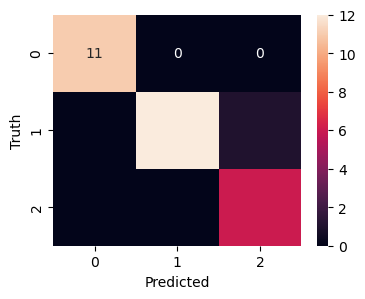

In [26]:
# Plotting the confusion matrix visualization
plt.figure(figsize = (4, 3))
sb.heatmap(con_mat, annot = True)
plt.xlabel('Predicted')
plt.ylabel('Truth');

### Classification Report

In [27]:
cls_report = classification_report(y_test, y_predict)
print(cls_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.92      0.96        13
           2       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30

